In [41]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [42]:
raw = pd.read_excel('data-facial-wash.xlsx')
raw.head()

,Merk_Produk,Harga,Jenis_Kulit,Rating,Jumlah_Terjual
0,Cetaphil Gentle Skin Cleanser,23250,1,3.504,1334
1,MS Glow Facial Wash,26500,2,4.231,978
2,COSRX Low pH Good Morning Gel Cleanser,16999,3,4.883,1243
3,COSRX Salicylic Acid Daily Gentle Cleanser,32500,4,4.654,256
4,Scarlett Whitening Facial Wash,21300,5,4.764,660


In [43]:
data = raw.drop(['Merk_Produk'], axis=1)
data.head()

,Harga,Jenis_Kulit,Rating,Jumlah_Terjual
0,23250,1,3.504,1334
1,26500,2,4.231,978
2,16999,3,4.883,1243
3,32500,4,4.654,256
4,21300,5,4.764,660


In [44]:
# Define hyperparameters
n_clusters_range = range(2, 15)
n_clusters = 4
max_iter = 1000
m = 2
error = 0.0001

In [45]:
# Apply fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data.to_numpy().T, n_clusters, m, error=error, maxiter=max_iter, init=None, seed=42
    )

# Predict cluster membership for each data2 point
cluster_membership = np.argmax(u, axis=0)

# Print the cluster centers
print('Cluster Centers:', cntr)
 
# Print the cluster membership for each data2 point
print('Cluster Membership:', cluster_membership)

Cluster Centers: [[1.61342340e+04 2.78760519e+00 4.22524801e+00 8.08586390e+02]
 [2.76168148e+04 2.22910147e+00 4.07790550e+00 7.48389368e+02]
 [8.62294573e+04 2.97190187e+00 4.67186218e+00 8.90801588e+02]
 [3.32661071e+04 1.86131610e+00 4.39352849e+00 7.41938851e+02]]
Cluster Membership: [1 1 0 3 0 0 3 0 0 0 3 3 0 0 0 1 3 3 2 0 3 3 0 3 3 2 3 0 3 2 1 2 3 3 0]


In [46]:
d

array([[ 7135.13760946, 10367.15033228,   967.74783274, 16375.09235373,
         5167.90298813,  2066.59777841, 16865.81015943,  2097.25903764,
         2184.00330218,  2866.26183738, 15867.87323349, 15568.32213724,
          636.85652744,  4073.98126649,   278.79389517,  5865.92846258,
        16365.81848597, 39666.30828521, 43865.91050288,  6684.28323522,
        15504.10153866, 21865.84455716,   879.91202134, 15793.09281213,
        16266.02295221, 83865.77088803, 15866.46180362,  2118.92170922,
        16365.87758908, 48868.02227876, 11876.40501528, 68781.57411202,
        16445.81128761, 15874.66326807,   266.41045974],
       [ 4405.90659465,  1140.17382761, 10629.32883534,  4907.94750495,
         6317.4337919 ,  9416.81532361,  5383.22868752, 13576.91593269,
        13622.78859417, 14342.50202644,  4387.67289457,  4085.80934102,
        12118.27511939,  7419.46772607, 11750.64453017,  5616.840121  ,
         4884.24244725, 28184.45576355, 32383.22762728, 18166.84778574,
       

In [47]:
initialized_u = u0.T
initialized_u

array([[0.16989996, 0.36670751, 0.35030788, 0.11308465],
       [0.50992314, 0.163382  , 0.10658273, 0.22011213],
       [0.46015959, 0.06140045, 0.00347142, 0.47496855],
       [0.25724951, 0.29402174, 0.35041189, 0.09831685],
       [0.1130563 , 0.31894914, 0.51221235, 0.0557822 ],
       [0.12029269, 0.09410784, 0.56216226, 0.22343721],
       [0.03909374, 0.33328366, 0.51911104, 0.10851156],
       [0.45485111, 0.01805829, 0.03888273, 0.48820787],
       [0.2245462 , 0.33967616, 0.13390469, 0.30187295],
       [0.41259956, 0.15079317, 0.06751783, 0.36908944],
       [0.00851418, 0.27403329, 0.35699791, 0.36045461],
       [0.35808648, 0.11508237, 0.23011894, 0.29671222],
       [0.44516155, 0.2781144 , 0.17695283, 0.09977122],
       [0.12380086, 0.31875051, 0.03705666, 0.52039197],
       [0.14940376, 0.15189306, 0.25553106, 0.44317212],
       [0.08024304, 0.42421214, 0.14227403, 0.35327078],
       [0.11247101, 0.28654789, 0.26971779, 0.33126332],
       [0.21685796, 0.38825217,

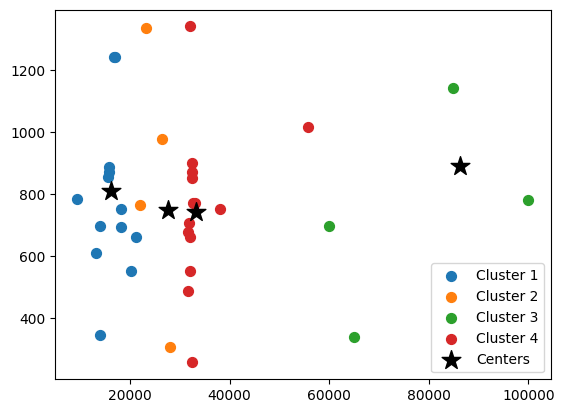

In [48]:
# Plot results (adjust if you have more than 2 features)
data_plot = data.to_numpy()
for j in range(n_clusters):
    plt.scatter(data_plot[:, 0][cluster_membership == j], 
                data_plot[:, 3][cluster_membership == j], 
                s=50, label=f'Cluster {j+1}')

plt.scatter(cntr[:, 0], cntr[:, 3], s=200, c='black', marker='*', label='Centers')
plt.legend()
plt.show()

In [49]:
# # Apply fuzzy c-means clustering
# fpcs = []
# for n_clusters in n_clusters_range:
#     cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T, n_clusters, m, error=error, maxiter=max_iter, init=None, seed=42)
#     fpcs.append(fpc)

In [50]:
# # Line plot of FPC vs. number of clusters
# plt.plot(n_clusters_range, fpcs)
# plt.xlabel('Number of Clusters')
# plt.ylabel('FPC')
# plt.title('FPC Variation')
# plt.show()